In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(x, w, b):
    return np.matmul(x, w) + b

def computeCost(x, y, w, b):
    pred = model(x, w, b)
    return np.mean((pred - y) ** 2) / 2

def computeGradient(x, y, w, b):
    pred = model(x, w, b)
    err = pred - y
    err = np.expand_dims(err, axis = 1)
    gradW = np.mean(err * x, axis = 0)
    gradB = np.mean(err)
    return gradW, gradB

def gradientDescent(x, y, w, b, alpha, iterCount):
    costs = []
    for i in range(iterCount):
        gradW, gradB = computeGradient(x, y, w, b)
        w = w - alpha * gradW
        b = b - alpha * gradB
        cost = computeCost(x, y, w, b)
        costs.append(cost)
        if i % (iterCount / 10) == 0:
            print(f"iter: {i}, cost: {cost:0.2f}")
    return w, b, costs

三種特徵縮放方式 
- Feature scaling:
$$x_i := \dfrac{x_i - min}{max - min} $$
- Mean normalization:
$$x_i := \dfrac{x_i - \mu_i}{max - min} $$
- Z-score normalization:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

In [3]:
def zScore(x):
    mean = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    xNorm = (x - mean) / sigma
    return xNorm

In [4]:
x = np.arange(0, 20, 1)
y = 1 + x**2

iter: 0, cost: 14157.59
iter: 1000, cost: 1981.04
iter: 2000, cost: 965.50
iter: 3000, cost: 878.85
iter: 4000, cost: 869.52
iter: 5000, cost: 866.64
iter: 6000, cost: 864.31
iter: 7000, cost: 862.04
iter: 8000, cost: 859.78
iter: 9000, cost: 857.53


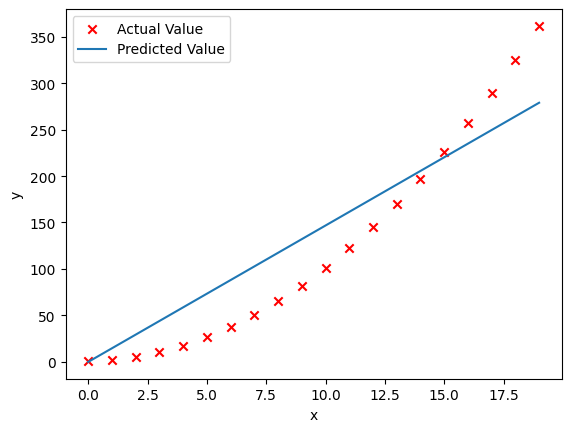

In [5]:
x1 = x.reshape(-1, 1)
w = np.zeros_like(x1[0])
b = 0
w, b, _ = gradientDescent(x1, y, w, b, 1e-5, 10000)

plt.scatter(x, y, marker = 'x',  c = 'red', label = "Actual Value")
plt.plot(x, model(x1, w, b), label = "Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

iter: 0, cost: 9521.91
iter: 1000, cost: 4.22
iter: 2000, cost: 3.24
iter: 3000, cost: 2.49
iter: 4000, cost: 1.91
iter: 5000, cost: 1.46
iter: 6000, cost: 1.12
iter: 7000, cost: 0.86
iter: 8000, cost: 0.66
iter: 9000, cost: 0.51


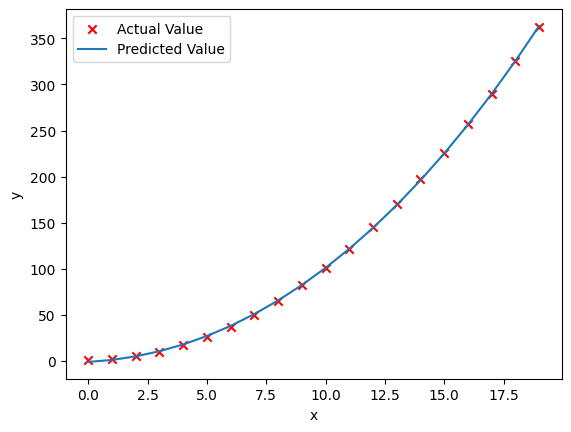

In [6]:
x1 = np.c_[x, x ** 2, x ** 3]
x1 = zScore(x1)
w = np.zeros_like(x1[0])
b = 0
w, b, _ = gradientDescent(x1, y, w, b, 1e-1, 10000)

plt.scatter(x, y, marker = 'x',  c = 'red', label = "Actual Value")
plt.plot(x, model(x1, w, b), label = "Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()